In [1]:
import sys
import os

# Get the absolute path to the proj_simulation root
proj_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if proj_root not in sys.path:
    sys.path.insert(0, proj_root)

In [2]:
from core import (Game, Player)
from strategies.proposers import (ConcedingProposer, RandomProposer, TitForTatProposer, LearningProposer, BinarySearchProposer, RiskAwareProposer, ForwardLookingProposer)
from strategies.responders import (UtilitarianResponder, TitForTatResponder, ProbabilisticResponder, StrategicRejectorResponder)

# Games Highlighted In Paper

### Republican Best Outcome: 
---
- R = (RiskAwareProposer,StrategicRejectorResponder)
- D = (RiskAwareProposer, NormalVarProbabilisticResponder)

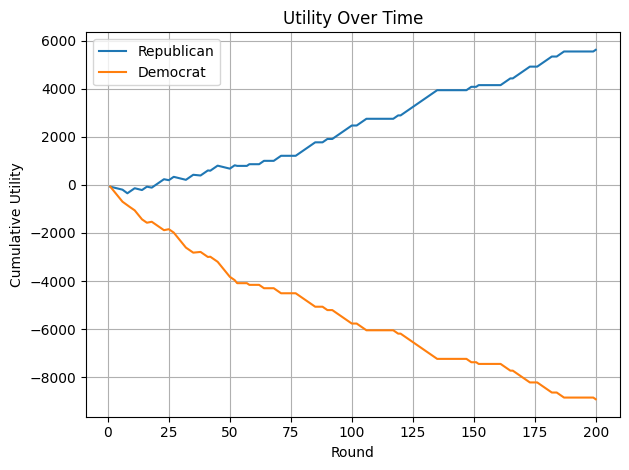

In [3]:
player1 = Player("Republican",
    proposer_strategy=RiskAwareProposer(),
    responder_strategy=StrategicRejectorResponder()
)

player2 = Player("Democrat",
    proposer_strategy=RiskAwareProposer(),
    responder_strategy=ProbabilisticResponder(alpha=1)
)

game = Game(
    player1=player1,
    player2=player2,
    p=0.25,
    player_1_bad=-50,
    player_2_bad=-100,
    proposer_bad=-25,
    receiver_bad=25,
    min_offer=0,
    max_offer=100,
    verbose=False,
    plot=True
)

game.run(200)

### Republican Worst Outcome

---
- R: (BinarySearchProposer, TitForTatResponder)
- D: (LearningProposer, StrategicRejectorResponder)

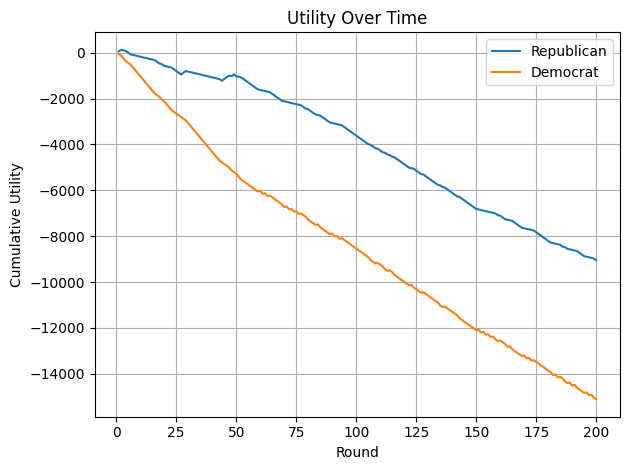

In [4]:
player1 = Player("Republican",
    proposer_strategy=BinarySearchProposer(min_offer=0, max_offer=100),
    responder_strategy=TitForTatResponder()
)

player2 = Player("Democrat",
    proposer_strategy=LearningProposer(start_offer=90,step_size=2),
    responder_strategy=StrategicRejectorResponder()
)

game = Game(
    player1=player1,
    player2=player2,
    p=0.25,
    player_1_bad=-50,
    player_2_bad=-100,
    proposer_bad=-25,
    receiver_bad=25,
    min_offer=0,
    max_offer=100,
    verbose=False,
    plot=True
)

game.run(200)

### Democrat Best Outcome
---
- R: (ConcedingProposer, UtilitarianResponder)
- D: (BinarySearchProposer, StrategicRejectorResponder)

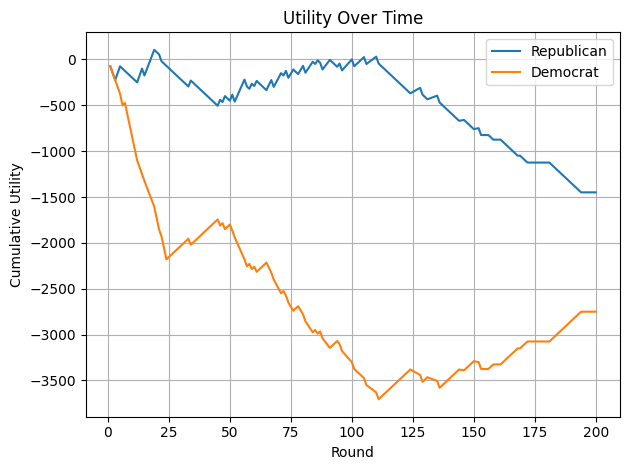

In [5]:
player1 = Player("Republican",
    proposer_strategy=ConcedingProposer(start_offer=90, decrement=5),
    responder_strategy=UtilitarianResponder()
)

player2 = Player("Democrat",
    proposer_strategy=BinarySearchProposer(min_offer=0, max_offer=100),
    responder_strategy=StrategicRejectorResponder()
)

game = Game(
    player1=player1,
    player2=player2,
    p=0.25,
    player_1_bad=-50,
    player_2_bad=-100,
    proposer_bad=-25,
    receiver_bad=25,
    min_offer=0,
    max_offer=100,
    verbose=False,
    plot=True
)

game.run(200)

### Democrat Worst Outcome
---
- R: (BinarySearchProposer, NormalVarProbabilisticResponder)
- D: (TitForTatProposer, TitForTatResponder)

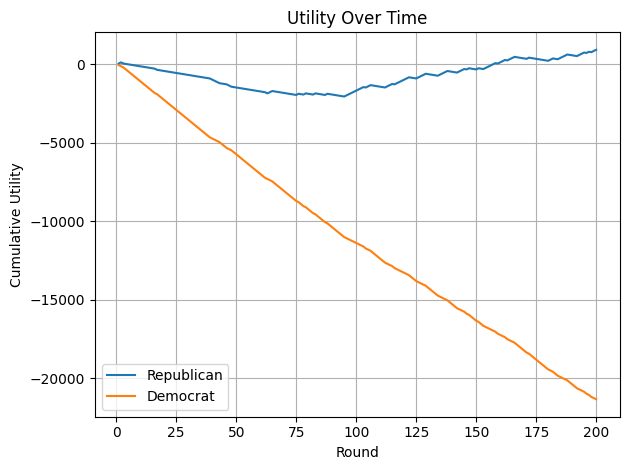

In [6]:
player1 = Player("Republican",
    proposer_strategy=BinarySearchProposer(min_offer=0, max_offer=100),
    responder_strategy=ProbabilisticResponder(alpha=1)
)

player2 = Player("Democrat",
    proposer_strategy=TitForTatProposer(),
    responder_strategy=TitForTatResponder()
)

game = Game(
    player1=player1,
    player2=player2,
    p=0.25,
    player_1_bad=-50,
    player_2_bad=-100,
    proposer_bad=-25,
    receiver_bad=25,
    min_offer=0,
    max_offer=100,
    verbose=False,
    plot=True
)

game.run(200)

### Best Relative Dem Performance
---
- R: (TitForTatProposer, UtilitarianResponder)
- D: (BinarySearchProposer, StrategicRejectorResponder)

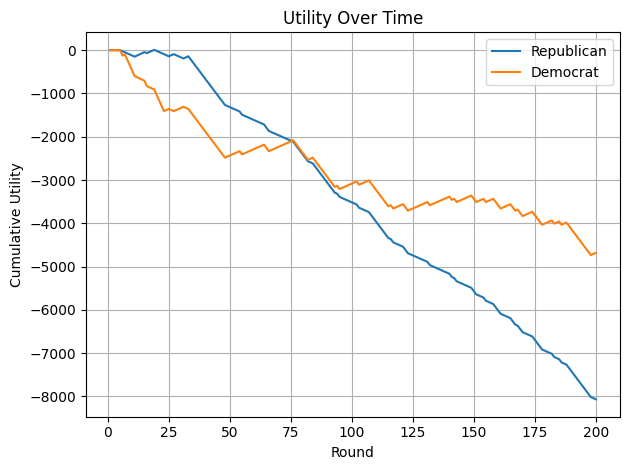

In [11]:
player1 = Player("Republican",
    proposer_strategy=TitForTatProposer(),
    responder_strategy=UtilitarianResponder()
)

player2 = Player("Democrat",
    proposer_strategy=BinarySearchProposer(min_offer=0, max_offer=100),
    responder_strategy=StrategicRejectorResponder()
)

game = Game(
    player1=player1,
    player2=player2,
    p=0.25,
    player_1_bad=-50,
    player_2_bad=-100,
    proposer_bad=-25,
    receiver_bad=25,
    min_offer=0,
    max_offer=100,
    verbose=False,
    plot=True
)

game.run(200)

### Best Relative Republican Performance
---
- R: (BinarySearchProposer, TitForTatResponder)
- D: (TitForTatProposer, UtilitarianResponder)

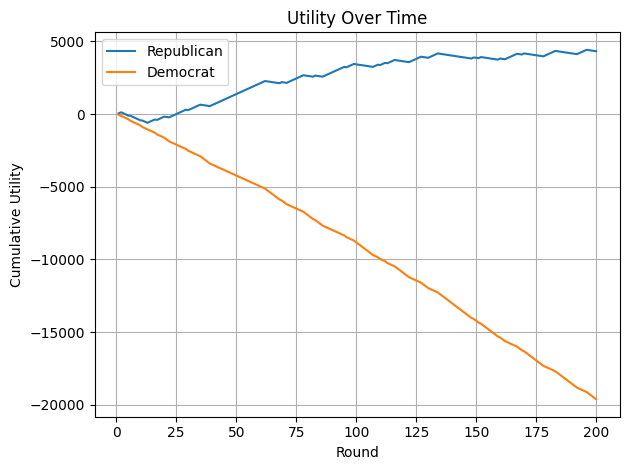

In [12]:
player1 = Player("Republican",
    proposer_strategy=BinarySearchProposer(min_offer=0, max_offer=100),
    responder_strategy=TitForTatResponder()
)

player2 = Player("Democrat",
    proposer_strategy=TitForTatProposer(),
    responder_strategy=UtilitarianResponder()
)

game = Game(
    player1=player1,
    player2=player2,
    p=0.25,
    player_1_bad=-50,
    player_2_bad=-100,
    proposer_bad=-25,
    receiver_bad=25,
    min_offer=0,
    max_offer=100,
    verbose=False,
    plot=True
)

game.run(200)

In [ ]:
proposers = [
    ("BinarySearchProposer", lambda: BinarySearchProposer(min_offer=0, max_offer=100)),
    ("ConcedingProposer", lambda: ConcedingProposer(start_offer=90, decrement=5)),
    ("TitForTatProposer", lambda: TitForTatProposer()),
    ("RandomProposer", lambda: RandomProposer(distribution="normal", mean=50, stddev=15)),
    ("LearningProposer", lambda: LearningProposer(start_offer=90,step_size=2)),
    ("RiskAwareProposer", lambda: RiskAwareProposer()),
    ("ForwardLookingProposer", lambda: ForwardLookingProposer()),
]

responders = [
    ("UtilitarianResponder", lambda: UtilitarianResponder()),
    ("TitForTatResponder", lambda: TitForTatResponder()),
    ("HighVarProbabilisticResponder", lambda: ProbabilisticResponder(alpha=0.1)),
    ("NormalVarProbabilisticResponder", lambda: ProbabilisticResponder(alpha=1)),
    ("StrategicRejectorResponder", lambda: StrategicRejectorResponder())
]